In [13]:
import time

from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By

In [14]:
driver = Chrome()
driver.get("https://quotes.toscrape.com/scroll")

In [15]:
last_height = driver.execute_script("return document.body.scrollHeight;")

while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(3)

    new_height = driver.execute_script("return document.body.scrollHeight;")

    if new_height == last_height:
        break
    last_height = new_height

In [16]:
quotes = driver.find_elements(By.CLASS_NAME, "quote")
texts = [ quote.find_element(By.CLASS_NAME, "text").text for quote in quotes ]
authors = [ quote.find_element(By.CLASS_NAME, "author").text for quote in quotes ]
tagsWithoutText = [ quote.find_element(By.CLASS_NAME, "tags").find_elements(By.CLASS_NAME,"tag") for quote in quotes ]
tags = [tag.text for sublist in tagsWithoutText for tag in sublist]
print(tags)

['change', 'deep-thoughts', 'thinking', 'world', 'abilities', 'choices', 'inspirational', 'life', 'live', 'miracle', 'miracles', 'aliteracy', 'books', 'classic', 'humor', 'be-yourself', 'inspirational', 'adulthood', 'success', 'value', 'life', 'love', 'edison', 'failure', 'inspirational', 'paraphrased', 'misattributed-eleanor-roosevelt', 'humor', 'obvious', 'simile']


In [18]:
class Quote:
    def __init__(self, text, author, tags):
        self.text = text
        self.author = author
        self.tags = [tag.text for tag in tags]

In [19]:
quotesObjects = []
for text, author, tags in zip(texts, authors, tagsWithoutText):
    quote = Quote(text, author, tags)
    quotesObjects.append(quote)

In [25]:
from collections import Counter
tags = [tag.text for sublist in tagsWithoutText for tag in sublist]
tag_counts = Counter(tags)

most_popular_tags = tag_counts.most_common(10)

for tag, count in most_popular_tags:
    print(f"{tag}: {count}")

inspirational: 3
life: 2
humor: 2
change: 1
deep-thoughts: 1
thinking: 1
world: 1
abilities: 1
choices: 1
live: 1


In [31]:
quoteDict = {}
for tag, _ in most_popular_tags:
    quotesWithTag = []
    for quoteObj in quotesObjects:
        if tag in quoteObj.tags:
            quotesWithTag.append(quoteObj.text)

    quoteDict[tag] = quotesWithTag


In [32]:
import pandas as pd

data = []

for tag, quotes in quoteDict.items():
    for quote in quotes:
        data.append({"Tag": tag, "Book Title": quote})

df = pd.DataFrame(data)
print(df)

              Tag                                         Book Title
0   inspirational  “There are only two ways to live your life. On...
1   inspirational  “Imperfection is beauty, madness is genius and...
2   inspirational  “I have not failed. I've just found 10,000 way...
3            life  “There are only two ways to live your life. On...
4            life  “It is better to be hated for what you are tha...
5           humor  “The person, be it gentleman or lady, who has ...
6           humor  “A day without sunshine is like, you know, nig...
7          change  “The world as we have created it is a process ...
8   deep-thoughts  “The world as we have created it is a process ...
9        thinking  “The world as we have created it is a process ...
10          world  “The world as we have created it is a process ...
11      abilities  “It is our choices, Harry, that show what we t...
12        choices  “It is our choices, Harry, that show what we t...
13           live  “There are only

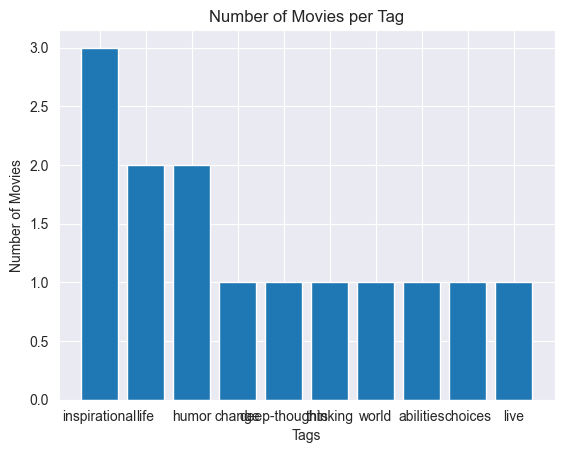

In [35]:
import matplotlib.pyplot as plt

tag_counts = df['Tag'].value_counts()
plt.bar(tag_counts.index, tag_counts)
plt.title('Number of Movies per Tag')
plt.xlabel('Tags')
plt.ylabel('Number of Movies')
plt.show()